## Study - Precision Matrix on Highly Correlated Vars

make a couple of vars that are extremelly correlated between each other and check the precision matrix

In [1]:
import pandas as pd
import numpy as np
import networkx as nx


import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [12]:
def data_generation_process():
    
    noise1 = np.random.normal(0, 0.2, 1000)
    noise2 = np.random.normal(0, 0.2, 1000)
    noise3 = np.random.normal(0, 0.2, 1000)
    noise4 = np.random.normal(0, 0.2, 1000)
    noise5 = np.random.normal(0, 0.2, 1000)
    
    X1 = np.random.normal(0, 1, 1000)
    X2 = 5*X1 + noise2
    X3 = -1 + X1 + noise3
    X4 = 2 + 2*X3 -2*X2 + noise4
    X5 = 1 + 2*X1 + noise5
    
    data = pd.DataFrame( {'X1':X1, 'X2':X2, 'X3':X3, 'X4':X4, 'X5':X5} )
    
    dag = gum.fastBN("X1->X2->X4;X1->X3->X4;X1->X5")
    return data, dag

In [13]:
corr_data, dag = data_generation_process()
corr_data

,X1,X2,X3,X4,X5
0,1.065239,5.284222,0.195648,-8.336638,3.234566
1,1.820871,9.120672,0.452236,-15.420664,4.869720
2,0.671489,3.420238,-0.271640,-5.126330,2.548300
3,-0.149860,-1.027916,-1.165362,1.713433,0.996479
4,0.962638,5.010672,-0.116474,-8.282055,2.930335
...,...,...,...,...,...
995,-0.121084,-0.870090,-1.137183,1.557938,0.556603
996,-2.414610,-11.886319,-3.543165,18.526963,-3.682526
997,0.997619,4.807571,0.103072,-7.521450,2.957947
998,0.660470,2.844447,-0.475372,-4.418469,2.178473


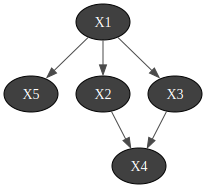

In [14]:
gnb.showBN(dag)

[[  0.99499681   4.97125194   0.98957317  -7.95949604   1.99993664]
 [  4.97125194  24.87757073   4.94349697 -39.84880954   9.9924263 ]
 [  0.98957317   4.94349697   1.02078743  -7.84120689   1.98863937]
 [ -7.95949604 -39.84880954  -7.84120689  64.02488607 -16.00050212]
 [  1.99993664   9.9924263    1.98863937 -16.00050212   4.05928166]]


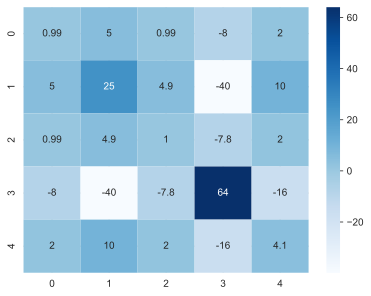

In [15]:
# generate covariance matrix
corr_mat = np.cov(corr_data.T)
print(corr_mat)

# plot correlation matrix with a blue pallet
fig, ax = plt.subplots()
sns.heatmap(corr_mat, annot=True, ax=ax, cmap="Blues")
plt.show()


In [16]:
# compute the precision matrix of data
precision_matrix = np.round(np.linalg.inv(corr_mat), 4)
precision_matrix

array([[ 7.579763e+02, -1.263212e+02, -2.885530e+01, -5.501000e-01,
        -5.051840e+01],
       [-1.263212e+02,  1.251414e+02, -1.002294e+02,  5.008830e+01,
         7.210000e-01],
       [-2.885530e+01, -1.002294e+02,  1.285780e+02, -5.037380e+01,
        -6.053000e-01],
       [-5.501000e-01,  5.008830e+01, -5.037380e+01,  2.506170e+01,
         4.362000e-01],
       [-5.051840e+01,  7.210000e-01, -6.053000e-01,  4.362000e-01,
         2.537710e+01]])

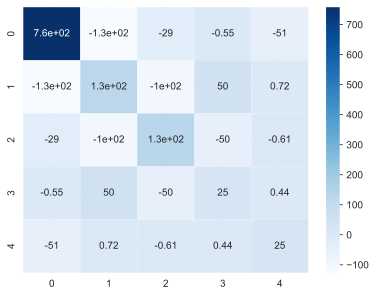

In [17]:
# visualize the precision matrix
fig, ax = plt.subplots()
sns.heatmap(precision_matrix, annot=True, ax=ax, cmap="Blues")
plt.show()
